<a href="https://colab.research.google.com/github/MelihKlc/Deep-Learning/blob/main/Project_1_Classification_and_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# An end-to-end Scikit-Learn worfklow
1. Getting the data ready
2. Choosing the right maching learning estimator/aglorithm/model for your problem
3. Fitting your chosen machine learning model to data and using it to make a prediction
4. Evaluting a machine learning model
5. Improving predictions through experimentation (hyperparameter tuning)
6. Saving and loading a pretrained model
7. Putting it all together in a pipeline

## 1- Getting the data ready

In [1]:
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv

--2023-09-15 15:07:03--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart-disease.csv.1’

heart-disease.csv.1 100%[===================>]  11.06K  --.-KB/s    in 0s      

2023-09-15 15:07:03 (80.6 MB/s) - ‘heart-disease.csv.1’ saved [11328/11328]



In [2]:
import pandas as pd
heart_diseas = pd.read_csv("/content/heart-disease.csv")
heart_diseas


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
# Create X (features matrix)
X = heart_diseas.drop("target" , axis = 1)
# Create y (labels)
y = heart_diseas["target"]

In [4]:
# Create test and training set
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size = 0.2 , random_state= 42
)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(242, 61, 242, 61)

In [5]:
# Testing our output is binary or not
y.nunique() # We have zero and 1 for output

2

## Our problem is classification problem

Lets create a neural network (baseline)

In [6]:
import tensorflow as tf
baseline = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)
baseline.compile(
    loss = tf.keras.losses.BinaryCrossentropy() ,
    optimizer = tf.keras.optimizers.Adam() ,
    metrics = ["accuracy"]
)
hist_0 = baseline.fit(
    X_train ,
    y_train ,
    epochs = 10 ,
    validation_data = ( X_test  , y_test)
)


Epoch 1/10
8/8 [==============================] - 5s 60ms/step - loss: 8.5404 - accuracy: 0.4463 - val_loss: 7.8389 - val_accuracy: 0.4918
Epoch 2/10
8/8 [==============================] - 0s 19ms/step - loss: 8.5404 - accuracy: 0.4463 - val_loss: 7.8389 - val_accuracy: 0.4918
Epoch 3/10
8/8 [==============================] - 0s 16ms/step - loss: 8.5404 - accuracy: 0.4463 - val_loss: 7.8389 - val_accuracy: 0.4918
Epoch 4/10
8/8 [==============================] - 0s 14ms/step - loss: 8.5404 - accuracy: 0.4463 - val_loss: 7.8389 - val_accuracy: 0.4918
Epoch 5/10
8/8 [==============================] - 0s 14ms/step - loss: 8.5404 - accuracy: 0.4463 - val_loss: 7.8389 - val_accuracy: 0.4918
Epoch 6/10
8/8 [==============================] - 0s 12ms/step - loss: 8.5404 - accuracy: 0.4463 - val_loss: 7.8389 - val_accuracy: 0.4918
Epoch 7/10
8/8 [==============================] - 0s 15ms/step - loss: 8.5404 - accuracy: 0.4463 - val_loss: 7.8389 - val_accuracy: 0.4918
Epoch 8/10
8/8 [===========

In [7]:
# Make prediction with our baseline
baseline_pred = baseline.predict(
    X_test
)
baseline_pred

2/2 [==============================] - 0s 6ms/step


array([[ -72.81336  ],
       [ -68.82969  ],
       [  13.863916 ],
       [-157.51907  ],
       [ -75.05453  ],
       [ -10.911671 ],
       [ -64.15967  ],
       [ -58.703964 ],
       [ -92.20663  ],
       [ -82.5739   ],
       [ -29.08955  ],
       [ -54.615635 ],
       [-117.06126  ],
       [ -33.581253 ],
       [ -56.065697 ],
       [ -60.14001  ],
       [ -60.716    ],
       [ -35.028385 ],
       [-102.75704  ],
       [ -12.386148 ],
       [ -30.967789 ],
       [ -83.34642  ],
       [ -55.52753  ],
       [ -77.95818  ],
       [ -72.67356  ],
       [ -50.62242  ],
       [ -64.04368  ],
       [ -72.94873  ],
       [ -73.83061  ],
       [ -80.606026 ],
       [ -69.988396 ],
       [ -35.288826 ],
       [ -77.11987  ],
       [ -59.123154 ],
       [ -36.863163 ],
       [ -65.42988  ],
       [ -67.91706  ],
       [ -77.30225  ],
       [ -40.906292 ],
       [ -85.58784  ],
       [ -52.08059  ],
       [ -44.97857  ],
       [ -39.412163 ],
       [ -5

In [8]:
# Improving our model because now it seem like sh1t. I will add activations and output layer
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(10 , activation = "relu") ,
        tf.keras.layers.Dense(1 , activation = "sigmoid")
    ]
)
model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy() ,
    optimizer = tf.keras.optimizers.Adam() ,
    metrics = ["accuracy"]
)
hist_1 = model_1.fit(
    X_train ,
    y_train ,
    epochs = 10 ,
    validation_data = ( X_test  , y_test)
)


Epoch 1/10
8/8 [==============================] - 3s 62ms/step - loss: 17.5340 - accuracy: 0.5496 - val_loss: 16.5161 - val_accuracy: 0.5246
Epoch 2/10
8/8 [==============================] - 0s 11ms/step - loss: 12.3721 - accuracy: 0.5496 - val_loss: 11.1989 - val_accuracy: 0.5246
Epoch 3/10
8/8 [==============================] - 0s 16ms/step - loss: 7.4024 - accuracy: 0.5496 - val_loss: 6.1989 - val_accuracy: 0.5246
Epoch 4/10
8/8 [==============================] - 0s 22ms/step - loss: 3.1324 - accuracy: 0.5661 - val_loss: 2.5768 - val_accuracy: 0.4262
Epoch 5/10
8/8 [==============================] - 0s 13ms/step - loss: 2.0959 - accuracy: 0.4463 - val_loss: 2.5077 - val_accuracy: 0.3443
Epoch 6/10
8/8 [==============================] - 0s 35ms/step - loss: 2.1472 - accuracy: 0.4298 - val_loss: 1.9689 - val_accuracy: 0.3770
Epoch 7/10
8/8 [==============================] - 0s 45ms/step - loss: 1.4571 - accuracy: 0.5826 - val_loss: 1.9463 - val_accuracy: 0.6393
Epoch 8/10
8/8 [=======

In [9]:
model_1_preds = model_1.predict(X_test)
model_1_preds

2/2 [==============================] - 0s 13ms/step


array([[0.6301108 ],
       [0.39966825],
       [0.9985209 ],
       [0.70597833],
       [0.00879134],
       [0.99535227],
       [0.63489676],
       [0.9999455 ],
       [0.06588658],
       [0.36137158],
       [0.9345495 ],
       [0.9868183 ],
       [0.8890963 ],
       [0.47755495],
       [0.70748335],
       [0.8633874 ],
       [0.98057574],
       [0.5566411 ],
       [0.48645145],
       [0.9894711 ],
       [0.99307126],
       [0.03339249],
       [0.32114986],
       [0.04121304],
       [0.7130648 ],
       [0.8495654 ],
       [0.91442186],
       [0.72805727],
       [0.71822417],
       [0.6272357 ],
       [0.02241823],
       [0.74752337],
       [0.00427458],
       [0.35354105],
       [0.9844111 ],
       [0.02346559],
       [0.45413473],
       [0.62839156],
       [0.7694692 ],
       [0.9093415 ],
       [0.19190702],
       [0.4710197 ],
       [0.37187943],
       [0.7953721 ],
       [0.86126655],
       [0.17398159],
       [0.32623896],
       [0.403

In [10]:
model_1.evaluate(X_test , y_test)

2/2 [==============================] - 0s 10ms/step - loss: 1.1635 - accuracy: 0.6066


[1.1635310649871826, 0.6065573692321777]

In [11]:
# I should round my probabilities because i will say that if my prediction probabilities is less than 0.5 , this will be 0 label.
tf.squeeze(tf.round(model_1_preds)).dtype

tf.float32

In [12]:
new_pred = tf.cast(tf.squeeze(tf.round(model_1_preds)), tf.int64)
new_pred

<tf.Tensor: shape=(61,), dtype=int64, numpy=
array([1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1])>

In [13]:
y_test.shape

(61,)

In [14]:
X_test.shape , y_test.shape

((61, 13), (61,))

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_true' contains the true labels and 'y_pred' contains the predicted labels
accuracy = accuracy_score(y_test, new_pred)
precision = precision_score(y_test, new_pred)
recall = recall_score(y_test, new_pred)
f1 = f1_score(y_test, new_pred)
conf_matrix = confusion_matrix(y_test, new_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.6065573770491803
Precision: 0.6111111111111112
Recall: 0.6875
F1 Score: 0.6470588235294118
Confusion Matrix:
[[15 14]
 [10 22]]


In [16]:
from sklearn.metrics import classification_report
print(classification_report( y_test , new_pred )  )

              precision    recall  f1-score   support

           0       0.60      0.52      0.56        29
           1       0.61      0.69      0.65        32

    accuracy                           0.61        61
   macro avg       0.61      0.60      0.60        61
weighted avg       0.61      0.61      0.60        61



# THESE WERE GENERAL VISION , NOW I WILL DIVE INTO

In [17]:
## Standart imports
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


## Getting data ready to be used in neural network
1. Split the data into features and labels ( X & y).
2. Filling ( also called imputing ) missing values.
3. Converting non-numerical values to numerical values ( also called feature encoding )

In [18]:
heart_disease = pd.read_csv("/content/heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### 1. Split data into features and labels ( X & y )

In [19]:
X = heart_disease.drop("target" , axis = 1)
y = heart_disease["target"]
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### Split the data into training and test set

In [21]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    X , y , test_size = 0.2 , random_state = 42
)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(242, 61, 242, 61)

### Make sure our data is all numerical

# We will use car_sales_extended data because our heart disease data is fully numerical

In [22]:
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv

--2023-09-15 15:07:26--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26277 (26K) [text/plain]
Saving to: ‘car-sales-extended.csv.1’

car-sales-extended. 100%[===================>]  25.66K  --.-KB/s    in 0.002s  

2023-09-15 15:07:27 (15.7 MB/s) - ‘car-sales-extended.csv.1’ saved [26277/26277]



In [23]:
car_sales_extended = pd.read_csv("/content/car-sales-extended.csv")
car_sales_extended

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [24]:
car_sales_extended.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           1000 non-null   object
 1   Colour         1000 non-null   object
 2   Odometer (KM)  1000 non-null   int64 
 3   Doors          1000 non-null   int64 
 4   Price          1000 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 39.2+ KB


In [25]:
car_sales_extended["Doors"].value_counts()  # 3 farklı şey oldugu icin categorical olarak alabiliriz yani one hot encoder yapıcaz.

4    856
5     79
3     65
Name: Doors, dtype: int64

In [26]:
# Split into car_sales data features and labels
X_car = car_sales_extended.drop("Price" , axis = 1)
y_car = car_sales_extended["Price"]

# Split into training and test set
X_train_car , X_test_car , y_train_car , y_test_car = train_test_split(
    X_car , y_car , test_size = 0.2
)
len(X_train_car) , len(X_test_car) , len(y_train_car) , len(y_test_car)


(800, 200, 800, 200)

## One hot encoding for our string variables

### ColumnTransformer kullanmamızın sebebi remainder = "passthrough" ile OneHotEncoder yapmayacağımız columnları hiçbir şey yapmadan korumak istediğimiz için. ColumnTransformer bize OneHotEncode gibi bazı şeyleri transform edip transform etmek istemediğimiz columnları da korumamızı sağlıyor.

### Mesela arabamız red
Toyota   Green Red Blue
                 
                         0      1       0         

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features = [ "Make" , "Colour" , "Doors" ]
one_hot = OneHotEncoder()
# ColumnTransformer gonna accept a list of tuples with a name , in this case we will call it one_hot and then we will pass the actual transformer that we want to use and we are going to pass it the list of features we would like to transform
transformer = ColumnTransformer( [ (
    "one_hot" ,  # Just name
    one_hot ,  # Our transformer
    categorical_features  # Our columns which we want to transform
 ) ]  , remainder = "passthrough"
)
transformed_X = transformer.fit_transform(X_car)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [28]:
pd.DataFrame(transformed_X)  # Odometer columns is 12. column

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


### Another way is pandas get_dummies

In [29]:
dummies = pd.get_dummies(
    car_sales_extended[ [ "Make" , "Colour" , "Doors" ] ]
)
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


### Turn into training and test set with our one hot encoded data

In [30]:
X_train_car , X_test_car , y_train_car , y_test_car = train_test_split(
    transformed_X ,
    y_car ,
    test_size = 0.2 ,
    random_state = 42
)
len(X_train_car) , len(X_test_car) , len(y_train_car) , len(y_test_car)

(800, 200, 800, 200)

In [31]:
pd.DataFrame(X_train_car )

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,112004.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35673.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,146824.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,45152.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,69954.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,218803.0
796,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,223685.0
797,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,61876.0
798,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,28625.0


## Create a model. First we will start with baseline

### Because we want to predict a number , this is regression problem.

#### We cannot calculate accuracy for a regression model.

The skill or performance of a regression model must be reported as an error in those predictions.

This makes sense if you think about it. If you are predicting a numeric value like a height or a dollar amount, you don’t want to know if the model predicted the value exactly (this might be intractably difficult in practice); instead, we want to know how close the predictions were to the expected values

In [32]:
# Create a baseline
baseline = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(1)
    ]
)
baseline.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam() ,
    metrics = ["mae"]
)
hist = baseline.fit(
    X_train_car ,
    y_train_car ,
    epochs = 10
)

Epoch 1/10
25/25 [==============================] - 2s 4ms/step - loss: 49644.4062 - mae: 49644.4062
Epoch 2/10
25/25 [==============================] - 0s 4ms/step - loss: 46630.4219 - mae: 46630.4219
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 43646.9258 - mae: 43646.9258
Epoch 4/10
25/25 [==============================] - 0s 4ms/step - loss: 40672.9961 - mae: 40672.9961
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 37793.7383 - mae: 37793.7383
Epoch 6/10
25/25 [==============================] - 0s 4ms/step - loss: 34973.1562 - mae: 34973.1562
Epoch 7/10
25/25 [==============================] - 0s 4ms/step - loss: 32257.9473 - mae: 32257.9473
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 29616.1230 - mae: 29616.1230
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 27101.9531 - mae: 27101.9531
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 24677.7266 - mae: 

In [33]:
## Evaluate on the test set
baseline.evaluate(X_test_car , y_test_car)

7/7 [==============================] - 0s 4ms/step - loss: 25337.0898 - mae: 25337.0898


[25337.08984375, 25337.08984375]

# Now we will see how we can deal with the missing values
1. Fill them with some values ( also known as imputation.)
2. Remove the samples with missing data altogether.

pandas have isna() function for missing values.

## The main takeaways:

1. Split your data first (into train/test), always keep your training & test data separate

2. Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

3. Don't use data from the future (test set) to fill data from the past (training set)

In [34]:
!wget https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv

--2023-09-15 15:07:31--  https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 30921 (30K) [text/plain]
Saving to: ‘car-sales-extended-missing-data.csv.1’

car-sales-extended- 100%[===================>]  30.20K  --.-KB/s    in 0.002s  

2023-09-15 15:07:32 (12.3 MB/s) - ‘car-sales-extended-missing-data.csv.1’ saved [30921/30921]



In [35]:
# Importing our missing data
car_sales_missing = pd.read_csv("/content/car-sales-extended-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [36]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

## First , we will fill the missing values.

### Option 1 : Fill missing data with pandas

In [37]:
# Fill the "Make" column. We cannot take a mean of string values or something like this , so we will fill with "missing"
car_sales_missing["Make"].fillna("missing" , inplace = True)


# Fill the "Colour" column. Same thing with above
car_sales_missing["Colour"].fillna("missing" , inplace = True)


# Fill the "Odometer (KM)" column. We will fill with the mean of Odometer column.
car_sales_missing["Odometer (KM)"].fillna( car_sales_missing["Odometer (KM)"].mean() , inplace = True )

# Fill the "Doors" column. We will fill with the mean of Doors column.
car_sales_missing["Doors"].fillna( 4 , inplace = True )




In [38]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

### Labela sahip olmayan datalarda predict çok zor olduğu için ve label columnu special bir column oldugu icin buradaki missing valueları herhangi bir şeyle doldurmayacağız. Direkt o columnları sileceğiz.

In [39]:
# Remove rows with missing Price labels
car_sales_missing.dropna(inplace=True)

In [40]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [41]:
len(car_sales_missing)  # Biraz data kaybı yaşıyoruz fakat bunu yapmak zorundayız.

950

## Second , we will convert our string data to number( One hot encode)

In [42]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
categorical_features = [ "Make" , "Colour" , "Doors" ]
one_hot = OneHotEncoder()
# ColumnTransformer gonna accept a list of tuples with a name , in this case we will call it one_hot and then we will pass the actual transformer that we want to use and we are going to pass it the list of features we would like to transform
transformer = ColumnTransformer( [ (
    "one_hot" ,  # Just name
    one_hot ,  # Our transformer
    categorical_features  # Our columns which we want to transform
 ) ]  , remainder = "passthrough"
)
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Feature Scaling
### For example, say you were trying to predict the sale price of cars and the number of kilometres on their odometers varies from 6,000 to 345,000 but the median previous repair cost varies from 100 to 1,700. A machine learning algorithm may have trouble finding patterns in these wide-ranging variables.

### To fix this, there are two main types of feature scaling.

### **Normalization (also called min-max scaling)** - This rescales all the numerical values to between 0 and 1, with the lowest value being close to 0 and the highest previous value being close to 1. Scikit-Learn provides functionality for this in the

## The main takeaways: ( For scikit-learn filling values)

1. Split your data first (into train/test), always keep your training & test data separate

2. Fill/transform the training set and test sets separately (this goes for filling data with pandas as well)

3. Don't use data from the future (test set) to fill data from the past (training set)

In [43]:
## Now we will import our dataset again
car_sales_m = pd.read_csv("/content/car-sales-extended-missing-data.csv")
car_sales_m

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [44]:
car_sales_m.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

### Önce labellardaki missing value olan columnları siliyoruz.

In [45]:
# Drop the rows with missing in the "Price" column
car_sales_m.dropna(subset=["Price"], inplace=True)

In [46]:
car_sales_m.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

### Second , we will split our data into features and labels then we will split into training and test set.

In [47]:
# Splitting features and labels
X_m = car_sales_m.drop("Price" , axis = 1)
y_m = car_sales_m["Price"]

# Splitting training and test set
X_train_m , X_test_m , y_train_m , y_test_m = train_test_split(
    X_m ,
    y_m ,
    test_size = 0.2 ,
    random_state = 42
)
len(X_train_m) , len(X_test_m) , len(y_train_m) , len(y_test_m)

(760, 190, 760, 190)

In [48]:
# Fill missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with "missing" and fill numerical values with mean
categorical_imputer = SimpleImputer(
    strategy="constant" , fill_value = "missing"  # Strategy constant oldugunda fill valuedaki değeri dolduruyor
)
# Door values 4
door_imputer = SimpleImputer(
    strategy = "constant" , fill_value = 4
)

numerical_imputer = SimpleImputer(
    strategy = "mean"
)

# Define columns
categorical_features = [ "Make" , "Colour" ]
door_features = [ "Doors" ]
numerical_features = [ "Odometer (KM)" ]

# Create an imputer (something that fills missing data)
imputer = ColumnTransformer(
    [
        ( "categorical_imputer" , categorical_imputer , categorical_features ) ,  # Name , Transformer , Features
        ( "door_imputer" , door_imputer , door_features ) ,
        ( "numerical_imputer" , numerical_imputer , numerical_features ) ,

    ] , remainder = "passthrough"
)

## We use fit_transform() on the training data and transform() on the testing data. In essence, we learn the patterns in the training set and transform it via imputation (fit, then transform). Then we take those same patterns and fill the test set (transform only).

In [49]:
# Now we will fit on X_train_m and transform X_train_m , X_test_m
imputer.fit(X_train_m)
X_train_filled = imputer.transform(X_train_m)
X_test_filled = imputer.transform(X_test_m)
X_train_filled


array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [50]:
car_sales_sklearn_train = pd.DataFrame(
    X_train_filled ,
    columns = [ "Make" , "Colour" , "Doors" , "Odometer (KM)" ]
)
car_sales_sklearn_test = pd.DataFrame(
    X_test_filled ,
    columns = [ "Make" , "Colour" , "Doors" , "Odometer (KM)" ]
)

car_sales_sklearn_train.isna().sum()



Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

## Now we dont have any missing values but we have categorical values, so next step we will make one hot encode

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

one_hot = OneHotEncoder()
cat_features = [ "Make" , "Colour" , "Doors" ]
transformer = ColumnTransformer(
    [
        (
            "one_hot" ,
             one_hot ,
            cat_features
        )
    ] , remainder = "passthrough"
)
transformed_X_train = transformer.fit_transform(car_sales_sklearn_train)
transformed_X_test = transformer.fit_transform(car_sales_sklearn_test)
transformed_X_train.toarray()




array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

## Now lets create a model

## Keras can't work with csr_matrix. Convert to a numpy array.

In [52]:
X_train_a = transformed_X_train.toarray()


In [53]:
model_1 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100 , activation = "relu" ) ,
        tf.keras.layers.Dense(10 , activation = "relu") ,
        tf.keras.layers.Dense(1)

    ]
)
model_1.compile(
    loss = tf.keras.losses.mae ,
    optimizer = tf.keras.optimizers.Adam() ,
    metrics = ["mae"]
)
hist_1 = model_1.fit(
    X_train_a ,
    y_train_m ,
    epochs = 100
)

Epoch 1/100
24/24 [==============================] - 3s 5ms/step - loss: 14013.2812 - mae: 14013.2812
Epoch 2/100
24/24 [==============================] - 0s 5ms/step - loss: 10198.7549 - mae: 10198.7549
Epoch 3/100
24/24 [==============================] - 0s 5ms/step - loss: 10163.3809 - mae: 10163.3809
Epoch 4/100
24/24 [==============================] - 0s 5ms/step - loss: 10159.9775 - mae: 10159.9775
Epoch 5/100
24/24 [==============================] - 0s 6ms/step - loss: 10156.6943 - mae: 10156.6943
Epoch 6/100
24/24 [==============================] - 0s 7ms/step - loss: 10162.9805 - mae: 10162.9805
Epoch 7/100
24/24 [==============================] - 0s 6ms/step - loss: 10156.0869 - mae: 10156.0869
Epoch 8/100
24/24 [==============================] - 0s 8ms/step - loss: 10161.5977 - mae: 10161.5977
Epoch 9/100
24/24 [==============================] - 0s 8ms/step - loss: 10163.0576 - mae: 10163.0576
Epoch 10/100
24/24 [==============================] - 0s 13ms/step - loss: 10163.1

In [54]:
X_test_a = transformed_X_test.toarray()

In [55]:
## Evaluate model
test_loss , test_accuracy = model_1.evaluate(
    X_test_a ,
    y_test_m
)

6/6 [==============================] - 0s 4ms/step - loss: 9309.4004 - mae: 9309.4004


In [56]:
test_accuracy

9309.400390625

In [57]:
y_test_m

203    10547.0
979    17940.0
729    12950.0
838     5905.0
919     9826.0
        ...   
625    10377.0
33      9780.0
31      6866.0
746    16705.0
305    18375.0
Name: Price, Length: 190, dtype: float64

In [58]:
model_1_preds = model_1.predict(X_test_a)
model_1_preds

6/6 [==============================] - 0s 2ms/step


array([[ 7405.5645],
       [ 1342.0511],
       [14663.24  ],
       [17472.645 ],
       [17182.953 ],
       [18365.428 ],
       [ 8169.671 ],
       [11528.49  ],
       [ 1983.0128],
       [ 9670.898 ],
       [17713.914 ],
       [ 2796.8901],
       [17127.922 ],
       [11865.216 ],
       [13462.625 ],
       [10423.084 ],
       [10856.333 ],
       [15887.02  ],
       [13714.866 ],
       [16688.455 ],
       [13065.019 ],
       [ 9668.86  ],
       [ 8329.413 ],
       [15314.962 ],
       [ 9651.92  ],
       [ 6509.222 ],
       [ 1201.2468],
       [12762.373 ],
       [ 1436.7246],
       [ 2530.6968],
       [ 4200.9717],
       [ 1660.0999],
       [14309.348 ],
       [ 9670.205 ],
       [ 6907.9033],
       [ 2358.08  ],
       [16507.72  ],
       [13327.615 ],
       [ 6436.5635],
       [17848.422 ],
       [ 8154.1025],
       [ 8864.52  ],
       [ 6346.3477],
       [ 6119.279 ],
       [ 9669.363 ],
       [13313.83  ],
       [16070.867 ],
       [17642

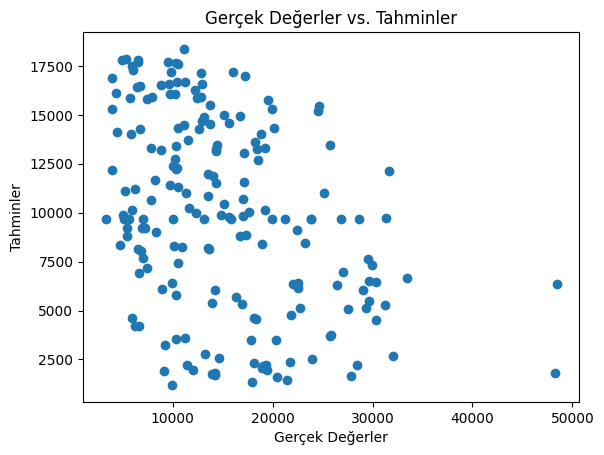

In [59]:
## Visualization for preds and real values
import matplotlib.pyplot as plt

plt.scatter(y_test_m, model_1_preds)
plt.xlabel('Gerçek Değerler')
plt.ylabel('Tahminler')
plt.title('Gerçek Değerler vs. Tahminler')
plt.show()

In [60]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test_m, model_1_preds)
mae

9309.401212993422

# Regression Problem

Lets use the California Housing dataset

In [61]:
# Get California Housing dataset
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

MedInc median income in block group

HouseAge median house age in block group

AveRooms average number of rooms per household

AveBedrms average number of bedrooms per household

Population block group population

AveOccup average number of household members

Latitude block group latitude

Longitude block group longitude

In [62]:
housing_df = pd.DataFrame(
    housing["data"] ,
    columns = housing["feature_names"] ,
    )
housing_df["target"] = housing["target"]   # We should add the target column manually
housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## First , we will split our data features and label

In [63]:
X = housing_df.drop("target" , axis = 1)
y = housing_df["target"]
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


## Second , we will split our data into training and test set

In [64]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(
    X ,
    y ,
    test_size = 0.2 ,
    random_state = 42
)
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(16512, 4128, 16512, 4128)

## Control the data has missing values or not and dtype.

In [65]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [66]:
y.info()  # We dont have any missing values and any string type values

<class 'pandas.core.series.Series'>
RangeIndex: 20640 entries, 0 to 20639
Series name: target
Non-Null Count  Dtype  
--------------  -----  
20640 non-null  float64
dtypes: float64(1)
memory usage: 161.4 KB


## Third , choose model for our data

###We looked at the sklearn-model-map and we cannot say anything about the "few features should be important" part , so we will see with experimentation.

### We will try Ridge model first.

In [67]:
from sklearn.linear_model import Ridge
model_1 = Ridge()
model_1.fit(
    X_train ,
    y_train
) # Fit on the train data

# Look score on test data
model_1.score(
    X_test ,
    y_test
)  # This is R Squared value, If you are going to close 1 , your model will be better.

0.5758549611440126

### Now we will try Ensemble Regressors model with linear kernel and we will compare our results.

### Ensemble model is combination of smaller models to try make better predictions than just a single model.

In [69]:
from sklearn.ensemble import RandomForestRegressor
model_2 = RandomForestRegressor()
model_2.fit(
    X_train ,
    y_train
)
model_2.score(
    X_test ,
    y_test
)

0.8053669638523385

## Now we will try Deep Learning model for our data

In [89]:
import tensorflow as tf
model_3 = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(100 , activation = "relu") ,
        tf.keras.layers.Dense(10, activation =  "relu") ,
        tf.keras.layers.Dense(1) ,

    ]
)
model_3.compile(
    loss = tf.keras.losses.mae ,
    optimizer = tf.keras.optimizers.Adam() ,
    metrics = ["mae"]
    )
model_3.fit(
    X_train ,
    y_train ,
    epochs = 25
)

Epoch 1/25
516/516 [==============================] - 3s 3ms/step - loss: 1.7378 - mae: 1.7378
Epoch 2/25
516/516 [==============================] - 2s 3ms/step - loss: 1.5562 - mae: 1.5562
Epoch 3/25
516/516 [==============================] - 2s 4ms/step - loss: 1.4265 - mae: 1.4265
Epoch 4/25
516/516 [==============================] - 1s 3ms/step - loss: 1.1210 - mae: 1.1210
Epoch 5/25
516/516 [==============================] - 1s 3ms/step - loss: 1.0525 - mae: 1.0525
Epoch 6/25
516/516 [==============================] - 1s 3ms/step - loss: 1.2676 - mae: 1.2676
Epoch 7/25
516/516 [==============================] - 1s 3ms/step - loss: 1.3669 - mae: 1.3669
Epoch 8/25
516/516 [==============================] - 1s 3ms/step - loss: 1.0348 - mae: 1.0348
Epoch 9/25
516/516 [==============================] - 1s 3ms/step - loss: 1.1212 - mae: 1.1212
Epoch 10/25
516/516 [==============================] - 1s 3ms/step - loss: 1.0326 - mae: 1.0326
Epoch 11/25
516/516 [============================

## Evaluate our deep learning model on test data

In [83]:
model_3.evaluate(
    X_test ,
    y_test
)

129/129 [==============================] - 0s 2ms/step - loss: 1.6120 - mae: 1.6120


[1.6119627952575684, 1.6119627952575684]

In [84]:
model_3_preds = model_3.predict(X_test)
model_3_preds

129/129 [==============================] - 0s 2ms/step


array([[-0.5830185 ],
       [-0.16544266],
       [ 0.8316615 ],
       ...,
       [ 2.560703  ],
       [ 0.18021707],
       [ 0.08299331]], dtype=float32)

In [87]:
len(y_test) , len(model_3_preds)

(4128, 4128)

## Visualization our predictions vs ground truth labels

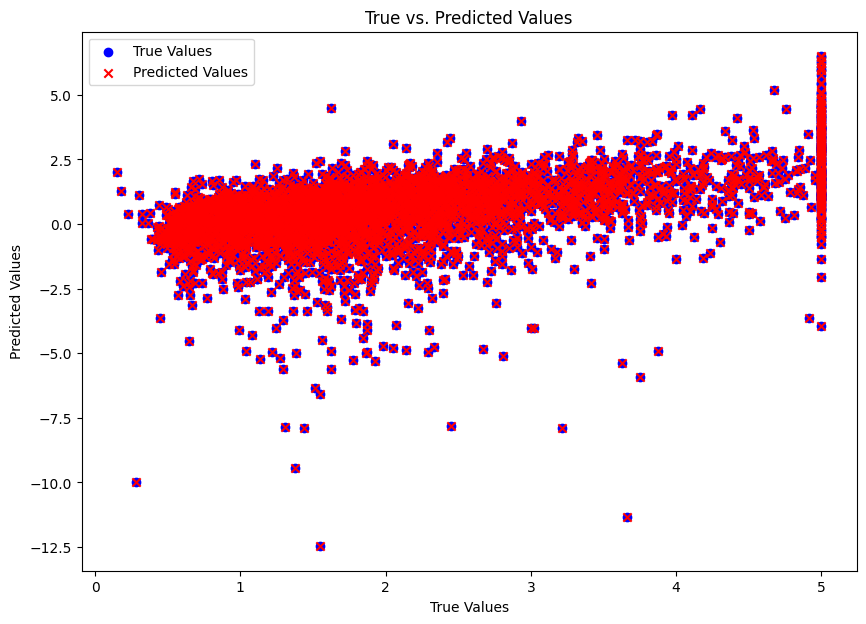

In [85]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10 , 7))

# Plot true values in blue and predicted values in red.
plt.scatter(y_test, model_3_preds, color='blue', label='True Values')
plt.scatter(y_test, model_3_preds, color='red', marker='x', label='Predicted Values')

plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()

## TIDBIT
1. If you have structured data (import ettigin data direkt DataFrame seklinde geliyorsa) , use ensemble methods.
2. If you have unstructured data (image , voice etc.) , use deep learning models.